In [20]:
import time

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from IPython import display

# Set up driver to connect to selenium grid

In [31]:
chromeOptions: Options = Options()
chromeOptions.set_capability("browserName", "chrome")
chromeOptions.set_capability("javascriptEnabled", True)
chromeOptions.add_argument("start-maximized")

# Chrome is controlled by automated test software
chromeOptions.add_experimental_option("excludeSwitches", ["enable-automation"])
chromeOptions.add_experimental_option('useAutomationExtension', False)

# avoiding detection
chromeOptions.add_argument('--disable-blink-features=AutomationControlled')

no_drivers = 4

print("Spwaning %d drivers for TikTok..." % no_drivers)
drivers = []
for i in range(no_drivers):
   print("\tSpawning driver %d" % i)
   drivers.append(webdriver.Remote(
      command_executor='http://127.0.0.1:4444/wd/hub',
      options=chromeOptions))
print("Done...")


Spwaning 4 drivers for TikTok...
	Spawning driver 0
	Spawning driver 1
	Spawning driver 2
	Spawning driver 3
Done...


## Login to TikTok


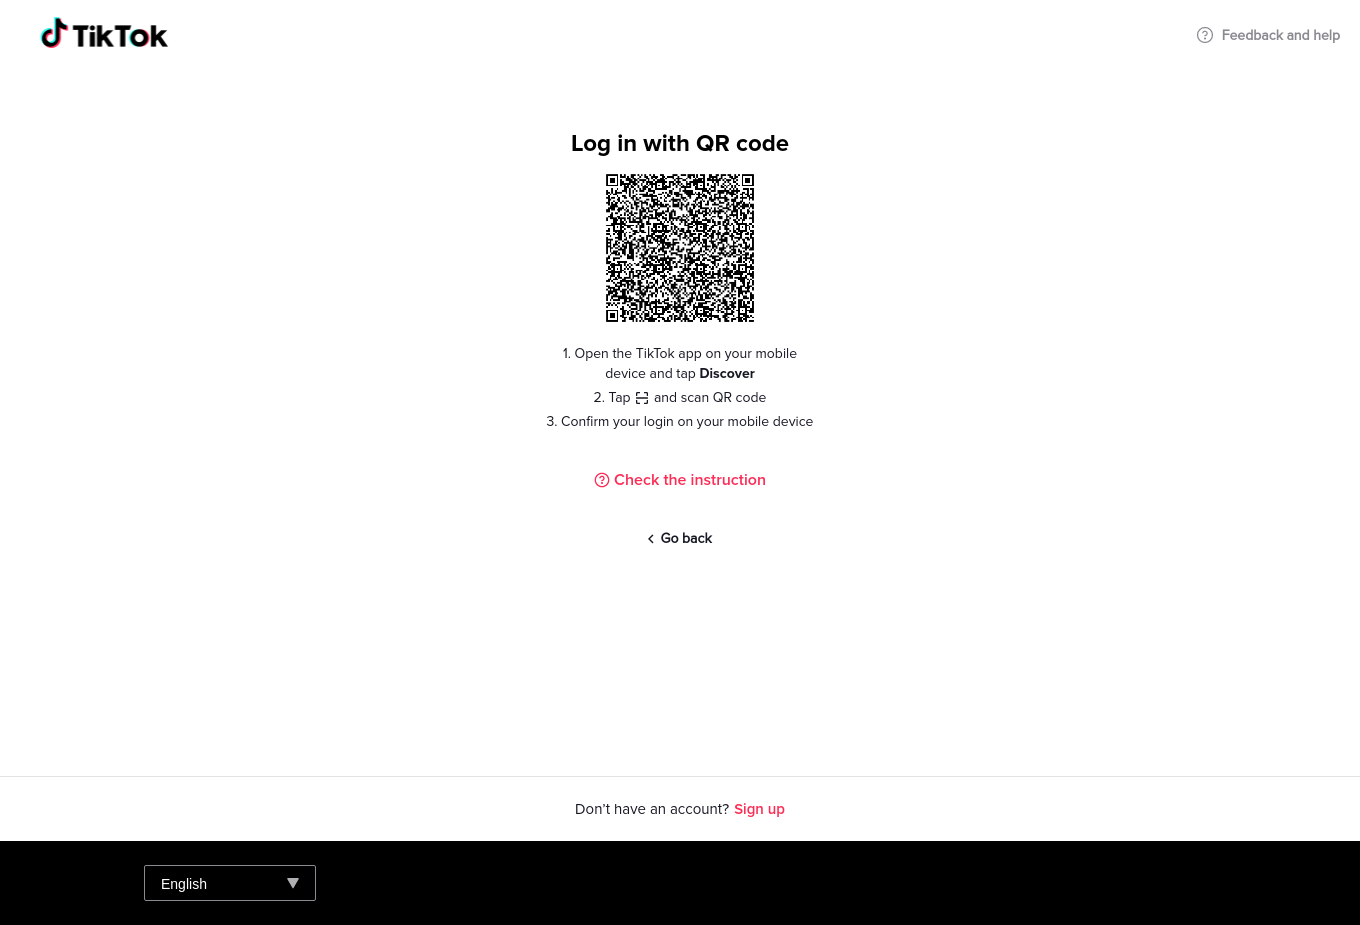
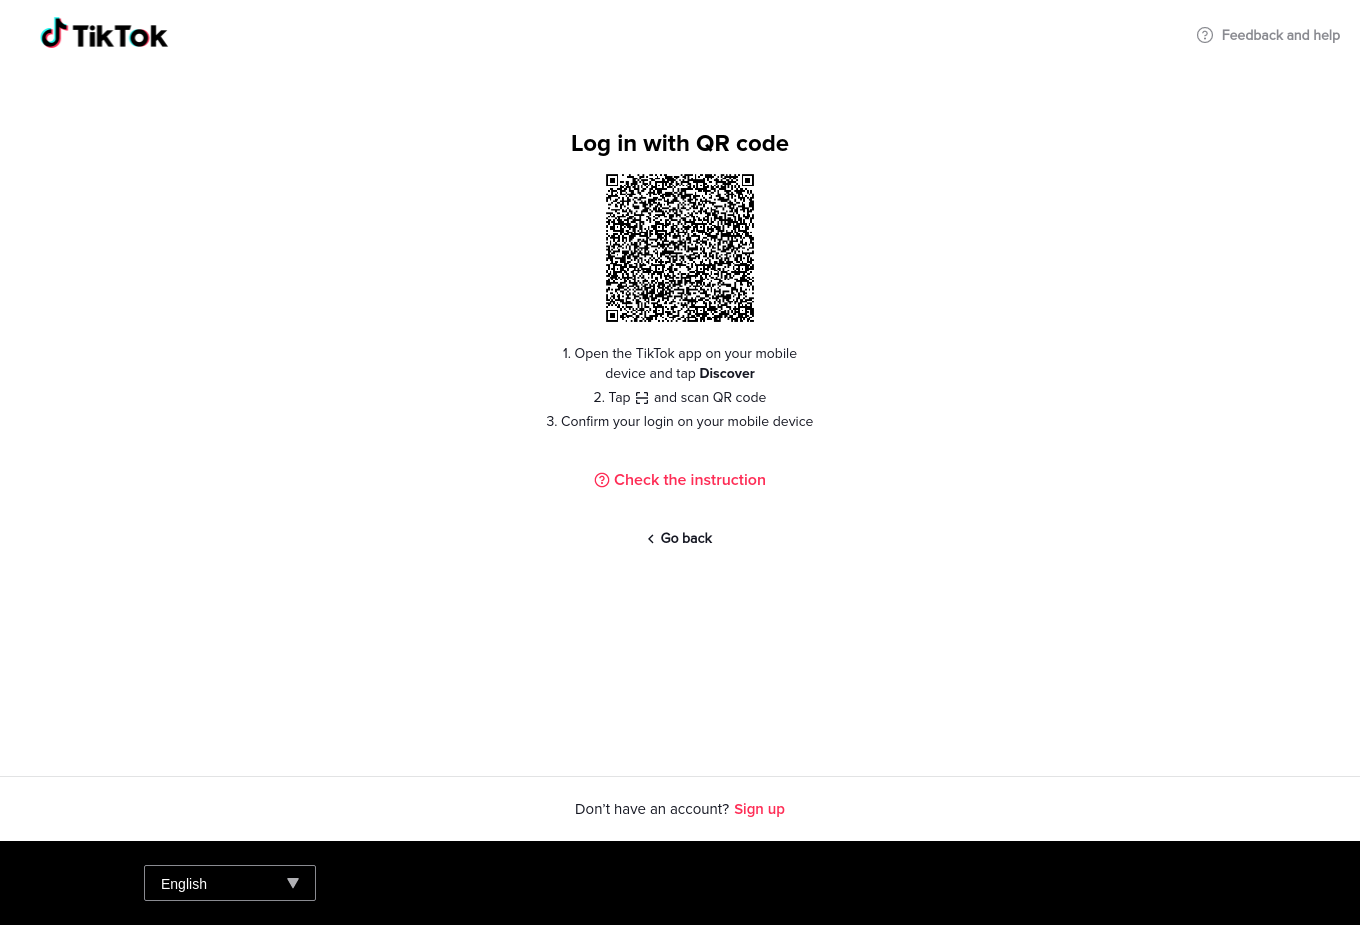
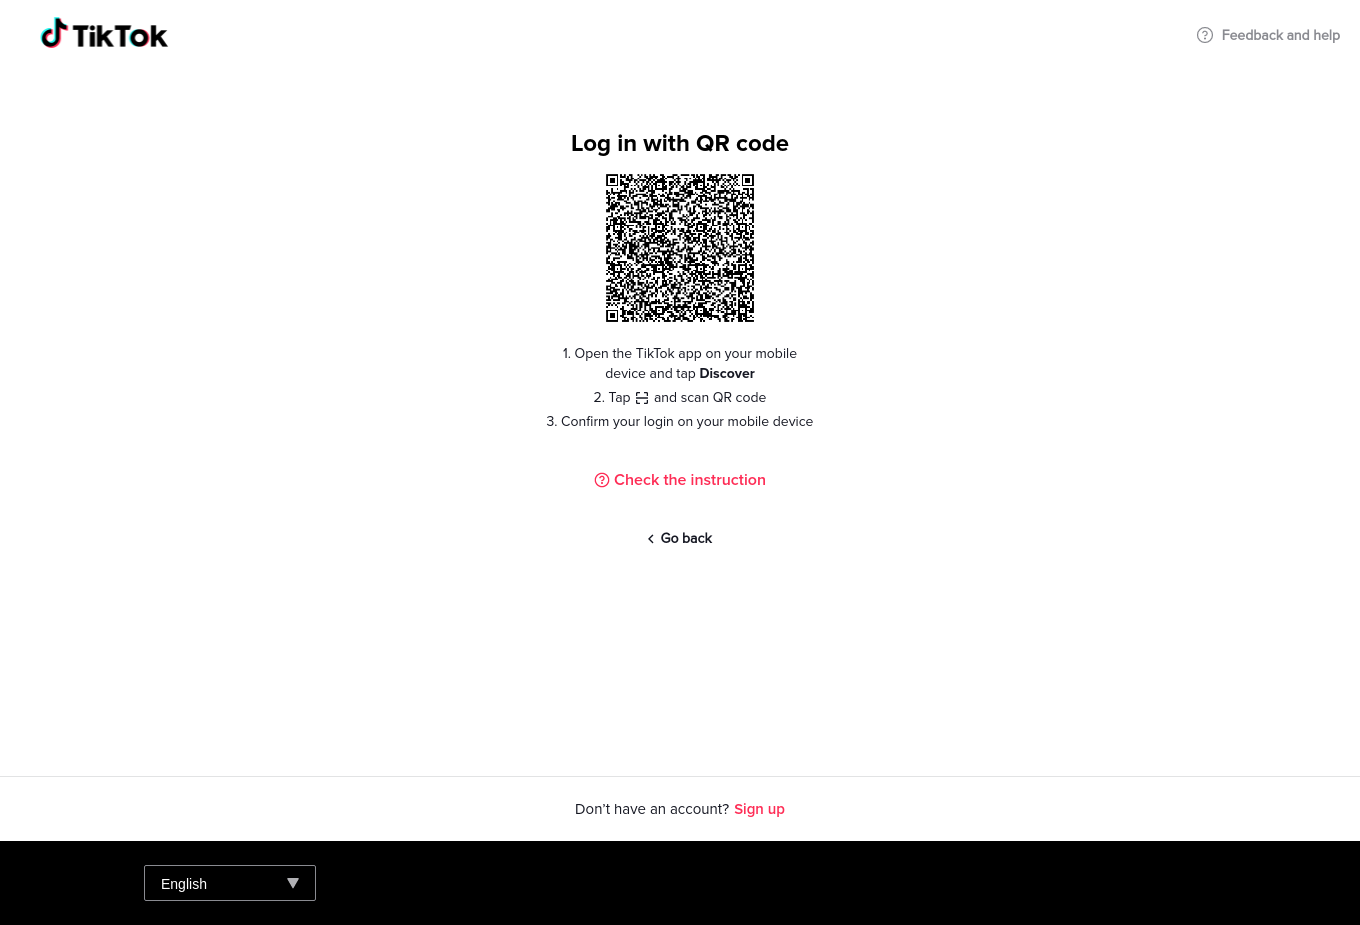
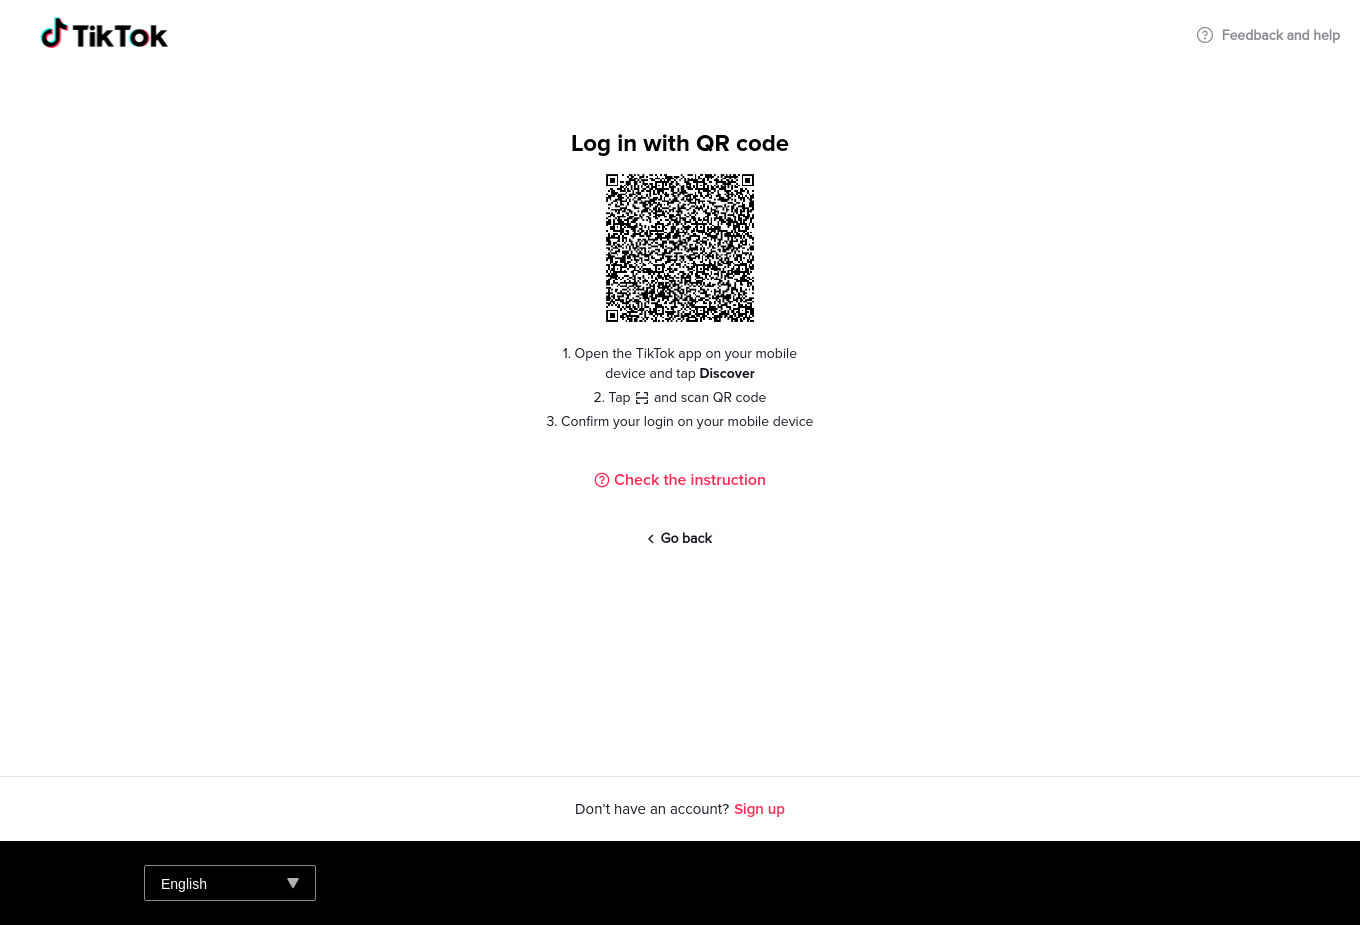

In [32]:
html = ""
for driver in drivers:
   driver.get('https://www.tiktok.com/login/qrcode')
   time.sleep(2)
   qr = driver.get_screenshot_as_base64()
   html = html + f'<img src="data:image/png;base64,{qr}" /><br/>'
print("Please login using the QR codes below")
display.HTML(html)

## Close drivers

In [33]:
for driver in drivers:
   driver.quit()